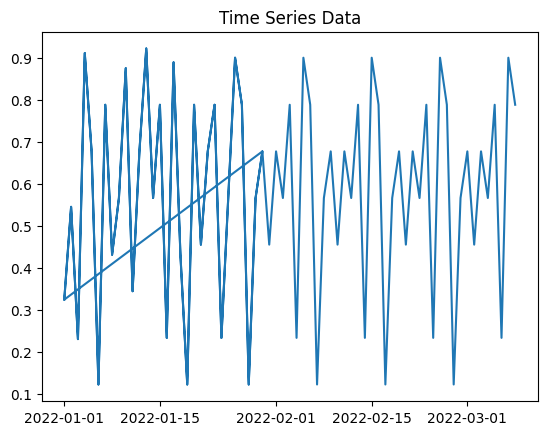

ADF Statistic: -3.9953985209786276
p-value: 0.001434798536348712


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools

# Step 2: Load the data
data = pd.read_csv('fake_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# Step 3: Preprocess the data
# Add any necessary preprocessing steps here

# Step 4: Visualize the data
plt.plot(data)
plt.title('Time Series Data')
plt.show()

# Step 5: Check stationarity
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# Check the p-value and other statistics to determine stationarity


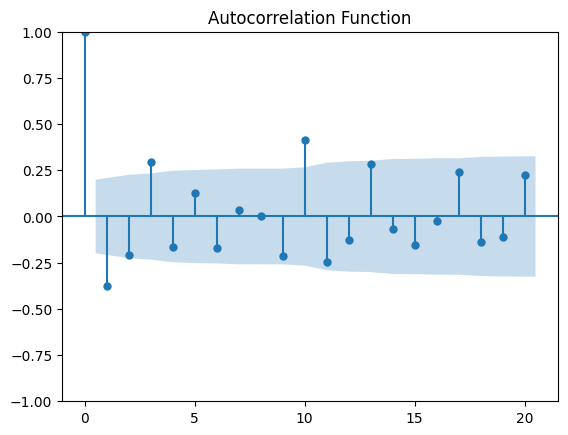

In [ ]:
# Step 6: Determine the order (p, d, q)
plot_acf(data)
plt.title('Autocorrelation Function')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


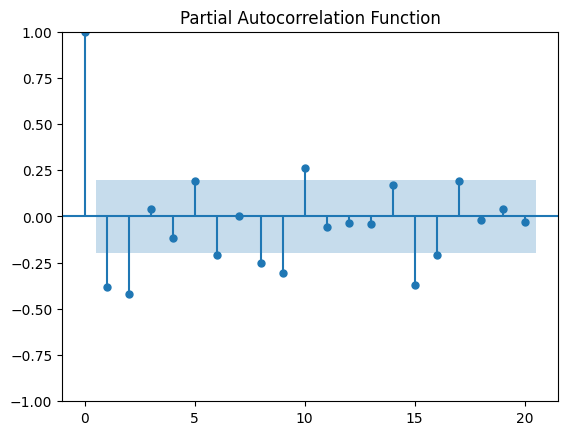

In [ ]:
plot_pacf(data)
plt.title('Partial Autocorrelation Function')
plt.show()
# Analyze ACF and PACF plots to determine the optimal values for p and q

In [ ]:
# Step 7: Define the range of values for p, d, and q

p_values = range(4, 7)  # Change the range according to your preference
d_values = range(0, 2)  # Change the range according to your preference
q_values = range(0, 3)  # Change the range according to your preference

In [ ]:
# Step 8: Generate all possible combinations of p, d, and q
parameters = itertools.product(p_values, d_values, q_values)

In [ ]:
best_aic = float("inf")  # Initialize the best AIC score

# Step 9: Iterate over all combinations and find the best model
for param in parameters:
    try:
        model = ARIMA(data, order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_param = param
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Step 10: Fit the ARIMA model using the best parameter values
best_model = ARIMA(data, order=best_param)
best_model_fit = best_model.fit()

# Step 11: Print the best parameter values and the fitted model summary
print("Best parameter values:", best_param)
print(best_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Best parameter values: (6, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   97
Model:                 ARIMA(6, 0, 1)   Log Likelihood                  24.293
Date:                Mon, 12 Jun 2023   AIC                            -30.587
Time:                        22:15:06   BIC                             -7.415
Sample:                             0   HQIC                           -21.217
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5750      0.003    193.977      0.000       0.569       0.581
ar.L1          0.2972      0.121      2.451      0.014       0.060       0.535
ar.L2         -0.08

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Step 12: Generate forecasts
forecast = best_model_fit.forecast(steps=10)  # Generate 10 future time steps
print(forecast)

97     0.223964
98     0.678837
99     0.555840
100    0.536212
101    0.583154
102    0.435462
103    0.653086
104    0.581417
105    0.510517
106    0.625405
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
